In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
POTDATA = pd.read_csv('POTDATA.csv')
POTDATA.head()

,red1,red2,red3,red4,red5,red6,red7,red8,red9,red10
0,176,175,177,178,176,174,173,177,175,175
1,185,182,184,182,182,182,180,181,182,181
2,198,197,194,197,196,196,198,198,198,198
3,228,229,229,227,228,228,228,226,229,228
4,260,259,260,261,260,259,258,258,258,257


In [11]:
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = POTDATA.median(axis=1).values.reshape(-1, 1)
y = list(range(0, len(POTDATA) * 2, 2))

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(y, y_pred_lasso)
print("Lasso MSE:", mse_lasso)

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X, y)
y_pred_bayesian_ridge = bayesian_ridge.predict(X)
mse_bayesian_ridge = mean_squared_error(y, y_pred_bayesian_ridge)
print("Bayesian Ridge MSE:", mse_bayesian_ridge)

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X, y)
y_pred_random_forest = random_forest.predict(X)
mse_random_forest = mean_squared_error(y, y_pred_random_forest)
print("Random Forest MSE:", mse_random_forest)

boosted_random_forest = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosted_random_forest.fit(X, y)
y_pred_boosted_random_forest = boosted_random_forest.predict(X)
mse_boosted_random_forest = mean_squared_error(y, y_pred_boosted_random_forest)
print("Boosted Random Forest MSE:", mse_boosted_random_forest)

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X, y)
y_pred_decision_tree = decision_tree.predict(X)
mse_decision_tree = mean_squared_error(y, y_pred_decision_tree)
print("Decision Tree MSE:", mse_decision_tree)

Lasso MSE: 9.278491479858081
Bayesian Ridge MSE: 9.278547255623842
Random Forest MSE: 0.22282455555555508
Boosted Random Forest MSE: 0.04257123614422823
Decision Tree MSE: 0.0425531914893617


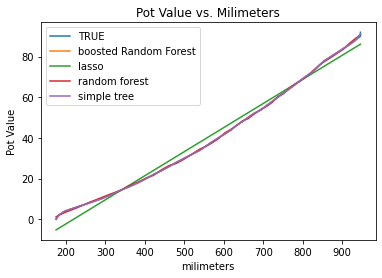

In [12]:
plt.plot(X, y, label='TRUE')
plt.plot(X, y_pred_boosted_random_forest, label='boosted Random Forest')
plt.plot(X, y_pred_lasso, label='lasso')
plt.plot(X, y_pred_random_forest, label='random forest')
plt.plot(X, y_pred_decision_tree, label='simple tree')
plt.xlabel('milimeters')
plt.ylabel('Pot Value')
plt.title('Pot Value vs. Milimeters')
plt.legend()
plt.show()

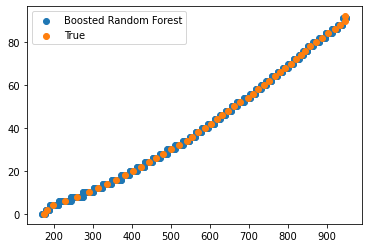

In [67]:
indexes = np.array(list(range(170,950))).reshape(-1,1)
BranforY = boosted_random_forest.predict(indexes)

plt.scatter(indexes,BranforY, label='Boosted Random Forest')
plt.scatter(X,y, label='True')
plt.legend()

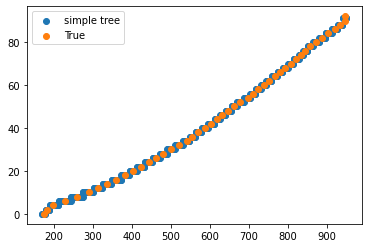

In [66]:
ranforY = decision_tree.predict(indexes)
plt.scatter(indexes,ranforY, label='simple tree')
plt.scatter(X,y, label='True')
plt.legend()

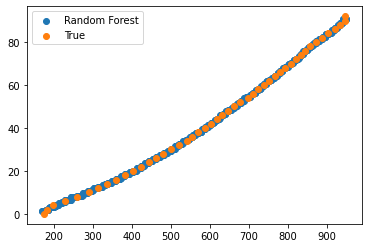

In [65]:
ranforY = random_forest.predict(indexes)
plt.scatter(indexes,ranforY, label='Random Forest')
plt.scatter(X,y, label='True')
plt.legend()

In [24]:
1/X.var()

1.9343743662138198e-05

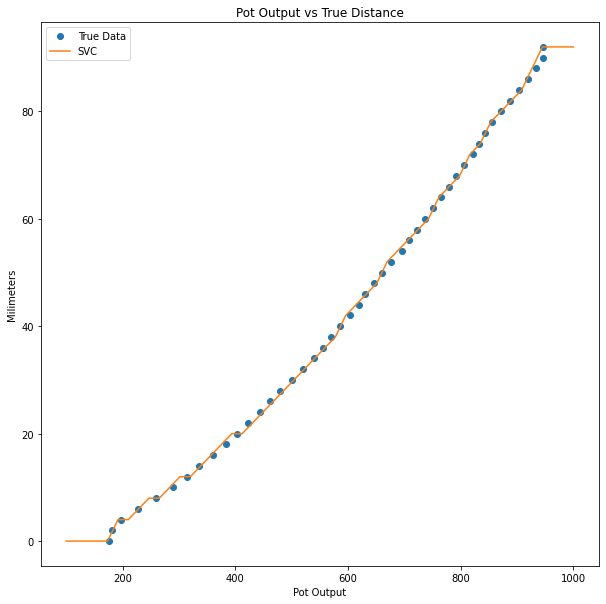

In [90]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', degree=1,gamma=0.01)
svc.fit(X, y)

X_new = np.linspace(100, 1000).reshape(-1, 1)
y_pred = svc.predict(X_new)
dTreePred = decision_tree.predict(X_new)

plt.figure(figsize=(10,10))
plt.plot(X, y, 'o', label='True Data')
plt.plot(X_new, y_pred, label='SVC')
plt.xlabel('Pot Output')
plt.ylabel('Milimeters')
plt.title('Pot Output vs True Distance')
plt.legend()
plt.show()

In [91]:
from sklearn_porter import Porter
porter = Porter(svc, language='c')
output = porter.export()
print(output)


#include <stdlib.h>
#include <stdio.h>
#include <math.h>

#define N_FEATURES 1
#define N_CLASSES 47
#define N_VECTORS 47
#define N_ROWS 47
#define N_COEFFICIENTS 46
#define N_INTERCEPTS 1081
#define KERNEL_TYPE 'r'
#define KERNEL_GAMMA 0.01
#define KERNEL_COEF 0.0
#define KERNEL_DEGREE 1

double vectors[47][1] = {{175.5}, {182.0}, {197.5}, {228.0}, {259.0}, {289.0}, {314.0}, {335.0}, {360.5}, {383.5}, {403.0}, {422.0}, {443.0}, {462.0}, {480.0}, {500.0}, {520.0}, {540.0}, {555.0}, {570.0}, {586.0}, {603.0}, {619.0}, {631.0}, {647.0}, {661.0}, {676.0}, {696.0}, {709.0}, {723.0}, {737.0}, {750.5}, {765.0}, {779.0}, {792.0}, {806.0}, {821.0}, {833.0}, {843.0}, {855.0}, {871.0}, {887.0}, {903.0}, {919.0}, {933.0}, {946.0}, {946.0}};
double coefficients[46][47] = {{1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1

In [92]:
CFile = open("SVM.c", "w")
n = CFile.write(output)
print(n)
CFile.close()

22156
